In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号  

from scipy.optimize import curve_fit
# rng = np.random.default_rng()
import os
path='pic' #创建图片文件
os.makedirs(path,exist_ok=True) 

# 规范化不确定度

In [33]:
from math import log,floor

def string_result(x,dx,latex=False):
    order_x=floor(log(abs(x))/log(10))
    order_dx=floor(log(abs(dx))/log(10))
    value_x=x/10**order_x
    value_dx=dx/10**order_dx
    delord=order_x-order_dx
    duobao=0
    if (value_dx<2):
        duobao=1
    
    value_dx=value_dx*10**(-delord)
    # order_x=log(x)/log(10)
    delord+=duobao
    value_x_show=f"{value_x:.{delord}f}"
    value_dx_show=f"{value_dx:.{delord}f}"

    if latex:
        return(f'$( {value_x_show}\\pm{value_dx_show} )\\times 10^{order_x}$')
    else:
        return(f'({value_x_show} ± {value_dx_show} )×10^{order_x}')

# 曲线拟合

## 裸机版本

第0个参数的结果为:$( 2.009\pm0.020 )\times 10^0$
第1个参数的结果为:$( 8\pm2 )\times 10^-1$
第2个参数的结果为:$( 2.0\pm0.4 )\times 10^0$
决定系数R^2为:0.9997289710931474


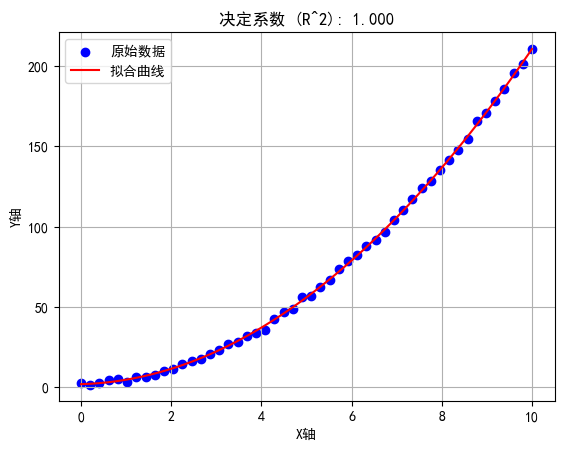

(array([2.00921811, 0.76665666, 1.99687026]),
 array([0.0196318 , 0.2030069 , 0.43894861]),
 0.9997289710931474)

In [34]:
# 定义非线性模型
def my_model(x, a, b, c):
    return a * x**2 + b * x + c

# 创建模拟数据
np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data = 2 * x_data**2 + 1 * x_data + 1 + np.random.normal(0, 1, 50)

# 使用curve_fit进行非线性拟合
params, covmatrix = curve_fit(my_model, x_data, y_data)

# 提取拟合参数

std = np.sqrt(np.diag(covmatrix))

# 计算拟合值
y_fit = my_model(x_data,*params )

# 计算总平方和（Total Sum of Squares，TSS）
y_mean = np.mean(y_data)
tss = np.sum((y_data - y_mean)**2)

# 计算残差平方和（Residual Sum of Squares，RSS）
rss = np.sum((y_data - y_fit)**2)

# 计算决定系数 R^2
r_squared = 1 - (rss / tss)

# 结果报道
for i in range(params.shape[0]):
    print(f'第{i}个参数的结果为:{string_result(params[i],std[i],latex=True)}')

print(f"决定系数R^2为:{r_squared}")



# 可视化拟合过程
plt.figure()
plt.scatter(x_data, y_data, label='原始数据', color='b')

max_value = np.max(x_data)
min_value = np.min(x_data)
linspace_xdata = np.linspace(min_value, max_value, 1000)

#如果是np可接受的函数会方便很多，这里考虑一般情况
linspace_ydata=[]
for v in linspace_xdata:
    linspace_ydata.append(my_model(v,*params))

linspace_ydata=np.array(linspace_ydata)

plt.plot(linspace_xdata, linspace_ydata, label='拟合曲线', color='r')
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.legend()
plt.grid()
plt.title(f"决定系数 (R^2): {r_squared:.3f}")
plt.show()


params,std,r_squared



## 封装版本

In [35]:
def my_curvefitting(your_model,x_data,y_data,figsize=(8,4),xlabel='X轴',ylabel='y轴',title='曲线拟合',curve_label='拟合曲线',data_label='原始数据',save=False):
    # 计算拟合结果
    params, covmatrix = curve_fit(your_model, x_data, y_data)
    std = np.sqrt(np.diag(covmatrix))

    # 计算决定系数
    y_fit = your_model(x_data,*params )
    y_mean = np.mean(y_data)
    tss = np.sum((y_data - y_mean)**2)
    rss = np.sum((y_data - y_fit)**2)
    r_squared = 1 - (rss / tss)

    # 结果报道
    for i in range(params.shape[0]):
        print(f'第{i}个参数的结果为:{string_result(params[i],std[i],latex=True)}')

    print(f"决定系数R^2为:{r_squared}")


    # 可视化拟合过程
    plt.figure(figsize=figsize)
    plt.scatter(x_data, y_data, label=data_label, color='b')

    max_value = np.max(x_data)
    min_value = np.min(x_data)
    linspace_xdata = np.linspace(min_value, max_value, 1000)

    #如果是np可接受的函数会方便很多，这里考虑一般情况
    linspace_ydata=[]
    for v in linspace_xdata:
        linspace_ydata.append(your_model(v,*params))

    linspace_ydata=np.array(linspace_ydata)

    plt.plot(linspace_xdata, linspace_ydata, label=curve_label, color='r')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.title(title)
    if save!=False:
        plt.savefig(save,bbox_inches='tight')

    plt.show()


    return params,std,r_squared



第0个参数的结果为:$( 2.009\pm0.020 )\times 10^0$
第1个参数的结果为:$( 8\pm2 )\times 10^-1$
第2个参数的结果为:$( 2.0\pm0.4 )\times 10^0$
决定系数R^2为:0.9997289710931474


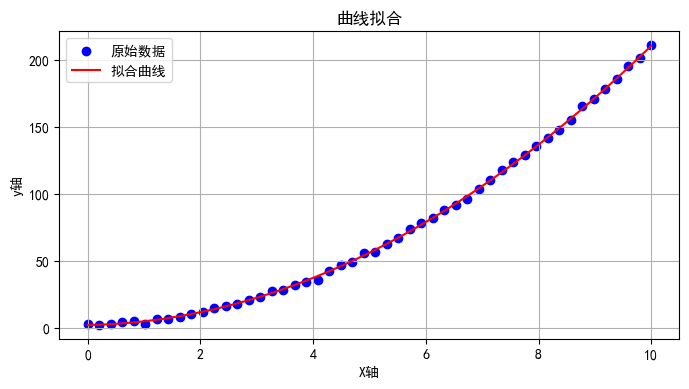

(array([2.00921811, 0.76665666, 1.99687026]),
 array([0.0196318 , 0.2030069 , 0.43894861]),
 0.9997289710931474)

In [36]:
# 定义非线性模型
def my_model(x, a, b, c):
    return a * x**2 + b * x + c

# 创建模拟数据
np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data = 2 * x_data**2 + 1 * x_data + 1 + np.random.normal(0, 1, 50)
my_curvefitting(my_model,x_data,y_data)

# 带误差拟合

# 裸机版

第0个参数的结果为:$( 2.13\pm0.03 )\times 10^0$
第1个参数的结果为:$( -6\pm3 )\times 10^-1$
第2个参数的结果为:$( 4.5\pm0.9 )\times 10^0$
决定系数R^2为:0.9992934102867238


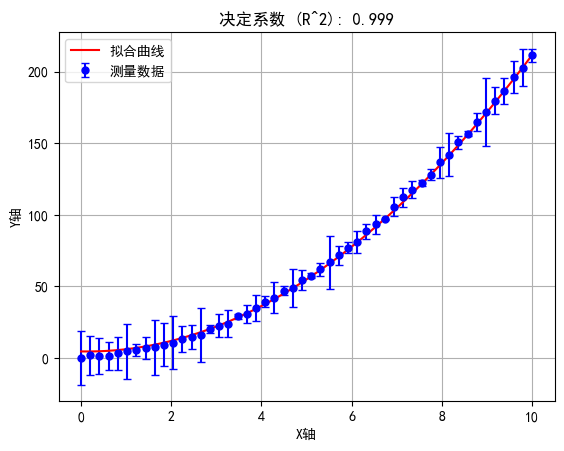

(array([ 2.12733551, -0.57489866,  4.48889818]),
 array([0.02989213, 0.32683867, 0.90889316]),
 0.9992934102867238)

In [37]:
# 定义非线性模型
def my_model(x, a, b, c):
    return a * x**2 + b * x + c

# 创建模拟数据
# np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data = 2 * x_data**2 + 1 * x_data + 1 + np.random.normal(0, 1, 50)
y_error = np.random.normal(0, 10, 50)

# 使用curve_fit进行非线性拟合
params, covmatrix = curve_fit(my_model, x_data, y_data,sigma=y_error)

# 提取拟合参数

std = np.sqrt(np.diag(covmatrix))

# 计算拟合值
y_fit = my_model(x_data,*params )

# 计算总平方和（Total Sum of Squares，TSS）
y_mean = np.mean(y_data)
tss = np.sum((y_data - y_mean)**2)

# 计算残差平方和（Residual Sum of Squares，RSS）
rss = np.sum((y_data - y_fit)**2)

# 计算决定系数 R^2
r_squared = 1 - (rss / tss)

# 结果报道
for i in range(params.shape[0]):
    print(f'第{i}个参数的结果为:{string_result(params[i],std[i],latex=True)}')

print(f"决定系数R^2为:{r_squared}")



# 可视化拟合过程
plt.figure()
plt.errorbar(x_data, y_data, yerr=y_error, fmt='bo', markersize=5, capsize=3, capthick=1, label='测量数据')

max_value = np.max(x_data)
min_value = np.min(x_data)
linspace_xdata = np.linspace(min_value, max_value, 1000)

#如果是np可接受的函数会方便很多，这里考虑一般情况
linspace_ydata=[]
for v in linspace_xdata:
    linspace_ydata.append(my_model(v,*params))

linspace_ydata=np.array(linspace_ydata)

plt.plot(linspace_xdata, linspace_ydata, label='拟合曲线', color='r')
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.legend()
plt.grid()
plt.title(f"决定系数 (R^2): {r_squared:.3f}")
plt.show()


params,std,r_squared



## 封装版

In [38]:
def my_curvefitting_error(your_model,x_data,y_data,y_error,figsize=(8,4),xlabel='X轴',ylabel='y轴',title='曲线拟合',curve_label='拟合曲线',data_label='原始数据',save=False):
    # 计算拟合结果
    params, covmatrix = curve_fit(your_model, x_data, y_data , sigma=y_error)
    std = np.sqrt(np.diag(covmatrix))

    # 计算决定系数
    y_fit = your_model(x_data,*params )
    y_mean = np.mean(y_data)
    tss = np.sum((y_data - y_mean)**2)
    rss = np.sum((y_data - y_fit)**2)
    r_squared = 1 - (rss / tss)

    # 结果报道
    for i in range(params.shape[0]):
        print(f'第{i}个参数的结果为:{string_result(params[i],std[i],latex=True)}')

    print(f"决定系数R^2为:{r_squared}")


    # 可视化拟合过程
    plt.figure(figsize=figsize)
    plt.errorbar(x_data, y_data, yerr=y_error, fmt='bo', markersize=5, capsize=3, capthick=1, label=data_label)

    max_value = np.max(x_data)
    min_value = np.min(x_data)
    linspace_xdata = np.linspace(min_value, max_value, 1000)

    #如果是np可接受的函数会方便很多，这里考虑一般情况
    linspace_ydata=[]
    for v in linspace_xdata:
        linspace_ydata.append(your_model(v,*params))

    linspace_ydata=np.array(linspace_ydata)

    plt.plot(linspace_xdata, linspace_ydata, label=curve_label, color='r')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.title(title)
    if save!=False:
        plt.savefig(save,bbox_inches='tight')

    plt.show()


    return params,std,r_squared



第0个参数的结果为:$( 2.14\pm0.02 )\times 10^0$
第1个参数的结果为:$( -3.5\pm1.8 )\times 10^-1$
第2个参数的结果为:$( 3.3\pm0.3 )\times 10^0$
决定系数R^2为:0.9995945443684768


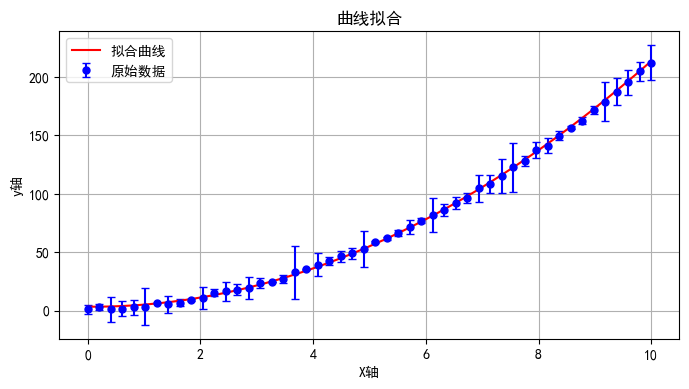

(array([ 2.1384592 , -0.35137846,  3.31750004]),
 array([0.023602  , 0.18184647, 0.33183936]),
 0.9995945443684768)

In [39]:
def my_model(x, a, b, c):
    return a * x**2 + b * x + c

# 创建模拟数据
# np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data = 2 * x_data**2 + 1 * x_data + 1 + np.random.normal(0, 1, 50)
y_error = np.random.normal(0, 10, 50)

my_curvefitting_error(my_model,x_data,y_data,y_error)

# 实例改装

当输入幅度为7.04时，偏差最大为3.2537705185524146，积分非线性性为0.006835652349900031
第0个参数的结果为:$( 4.913\pm0.014 )\times 10^1$
第1个参数的结果为:$( -2.0\pm0.8 )\times 10^0$
决定系数R^2为:0.9998607588986919


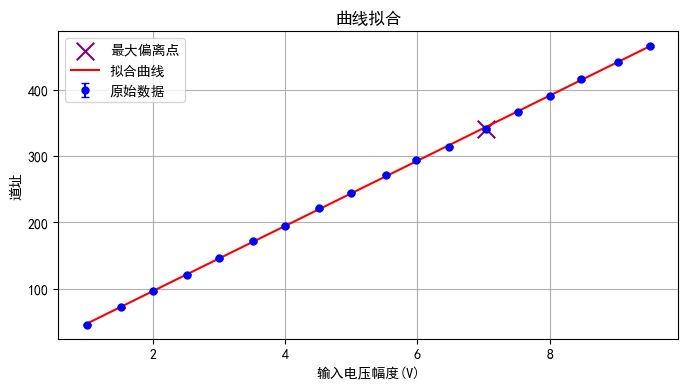

(array([49.12591974, -1.95270446]),
 array([0.14029854, 0.82632222]),
 0.9998607588986919)

In [47]:
def my_curvefitting_error(your_model,x_data,y_data,y_error,figsize=(8,4),xlabel='X轴',ylabel='y轴',title='曲线拟合',curve_label='拟合曲线',data_label='原始数据',save=False):
    # 计算拟合结果
    params, covmatrix = curve_fit(your_model, x_data, y_data , sigma=y_error)
    std = np.sqrt(np.diag(covmatrix))

    # 计算决定系数
    y_fit = your_model(x_data,*params )
    y_mean = np.mean(y_data)
    tss = np.sum((y_data - y_mean)**2)
    rss = np.sum((y_data - y_fit)**2)
    r_squared = 1 - (rss / tss)

    #计算最大偏移
    dy=np.abs((y_data - y_fit))
    i_max=np.argmax(dy)
    print(f'当输入幅度为{x_data[i_max]}时，偏差最大为{dy[i_max]}，积分非线性性为{dy[i_max]/476}')

    plt.figure(figsize=figsize)

    plt.scatter(x_data[i_max], y_data[i_max], s=160, marker='x',color='purple', label='最大偏离点')
    # 结果报道
    for i in range(params.shape[0]):
        print(f'第{i}个参数的结果为:{string_result(params[i],std[i],latex=True)}')

    print(f"决定系数R^2为:{r_squared}")


    # 可视化拟合过程
    plt.errorbar(x_data, y_data, yerr=y_error, fmt='bo', markersize=5, capsize=3, capthick=1, label=data_label)

    max_value = np.max(x_data)
    min_value = np.min(x_data)
    linspace_xdata = np.linspace(min_value, max_value, 1000)

    #如果是np可接受的函数会方便很多，这里考虑一般情况
    linspace_ydata=[]
    for v in linspace_xdata:
        linspace_ydata.append(your_model(v,*params))

    linspace_ydata=np.array(linspace_ydata)

    plt.plot(linspace_xdata, linspace_ydata, label=curve_label, color='r')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.title(title)
    if save!=False:
        plt.savefig(save,bbox_inches='tight')

    plt.show()


    return params,std,r_squared




df = pd.read_excel('INL.xlsx')
A_data = df['脉冲幅度（V）'].to_numpy(dtype=float)

D_data = df['多道分析均值'].to_numpy(dtype=float)
D_error = df['多道分析方差'].to_numpy(dtype=float)
# A_data.shape[0],D_data.shape[0],D_error.shape[0]
def linear_model(x, a, b):
    return a * x + b

my_curvefitting_error(linear_model,A_data,D_data,D_error,xlabel='输入电压幅度(V)',ylabel='道址',save='../pic/INL.pdf')
# A_data,D_data,D_error
